{% include toc title="In This Lesson" icon="file-text" %}

<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

After completing this tutorial, you will be able to:

* Describe atleast 2 reasons that a data provider may chose to store a dataset in a particular CRS.
* Reproject a vector dataset to another CRS in R.
* Identify the CRS of a spatial dataset in R.

## <i class="fa fa-check-square-o fa-2" aria-hidden="true"></i> What you need

You will need a computer with internet access to complete this lesson and the data for week 5 of the course.

[<i class="fa fa-download" aria-hidden="true"></i> Download Week 5 Data (~500 MB)](https://ndownloader.figshare.com/files/7525363){:data-proofer-ignore='' .btn }

</div>

## Working With Spatial Data From Different Sources

We often need to gather spatial datasets for from
different sources and/or data that cover different spatial `extents`. Spatial
data from different sources and that cover different extents are often in
different Coordinate Reference Systems (CRS).

Some reasons for data being in different CRSs include:

1. The data are stored in a particular CRS convention used by the data
provider which might be a federal agency, or a state planning office.
2. The data are stored in a particular CRS that is customized to a region.
For instance, many states prefer to use a **State Plane** projection customized
for that state.

<figure>
    <a href="{{ site.url }}/images/course-materials/earth-analytics/week-5/different_projections.jpg">
    <img src="{{ site.url }}/images/course-materials/earth-analytics/week-5/different_projections.jpg" alt="Maps of the United States using data in different projections.">
    </a>

    <figcaption>Maps of the United States using data in different projections.
    Notice the differences in shape associated with each different projection.
    These differences are a direct result of the calculations used to "flatten"
    the data onto a 2-dimensional map. Often data are stored purposefully in a
    particular projection that optimizes the relative shape and size of
    surrounding geographic boundaries (states, counties, countries, etc).
    Source: opennews.org</figcaption>
</figure>

In this tutorial we will learn how to identify and manage spatial data
in different projections. We will learn how to `reproject` the data so that they
are in the same projection to support plotting / mapping. Note that these skills
are also required for any geoprocessing / spatial analysis. Data need to be in
the same CRS to ensure accurate results.

We will use the `rgdal` and `raster` libraries in this tutorial.


In [2]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import os 
plt.ion()

In [3]:
# be sure to set your working directory
os.chdir("/Users/lewa8222/Documents/earth-analytics")


## Import US Boundaries - Census Data

There are many good sources of boundary base layers that we can use to create a
basemap. Some `Python` packages even have these base layers built in to support quick
and efficient mapping. In this tutorial, we will use boundary layers for the
United States, provided by the
<a href="https://www.census.gov/geo/maps-data/data/cbf/cbf_state.html" target="_blank" data-proofer-ignore=''> United States Census Bureau.</a>

It is useful to have shapefiles to work with because we can add additional
attributes to them if need be - for project specific mapping.

## Read US Boundary File

We will use the geopandas `.read_file()` function to import the
`/usa-boundary-layers/US-State-Boundaries-Census-2014` layer into `Python`. This layer
contains the boundaries of all continental states in the U.S. Please note that
these data have been modified and reprojected from the original data downloaded
from the Census website to support the learning goals of this tutorial.

In [7]:
state_boundary_us = gpd.read_file('data/week5/usa-boundary-layers/US-State-Boundaries-Census-2014.shp')
# what is the structure of the data that we imported?
type(state_boundary_us)


geopandas.geodataframe.GeoDataFrame

In [8]:
# view the first 6 lines of the attribute table & associated geometry for the state boundary layer
state_boundary_us.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,region
0,0400000US06,403483823181,20483271881,06,00,California,06,01779778,CA,"(POLYGON Z ((-118.593969 33.467198 0, -118.484...",West
1,0400000US11,158350578,18633500,11,00,District of Columbia,11,01702382,DC,"POLYGON Z ((-77.119759 38.934343 0, -77.041017...",Northeast
2,0400000US12,138903200855,31407883551,12,00,Florida,12,00294478,FL,"(POLYGON Z ((-81.81169299999999 24.568745 0, -...",Southeast
3,0400000US13,148963503399,4947080103,13,00,Georgia,13,01705317,GA,"POLYGON Z ((-85.605165 34.984678 0, -85.474338...",Southeast
4,0400000US16,214045425549,2397728105,16,00,Idaho,16,01779783,ID,"POLYGON Z ((-117.243027 44.390974 0, -117.2150...",West


Next, let's plot the U.S. states data.

## Note - i'm wondering if we can be more consistent with plotting. It seems sometimes we set the axes fig size differently?? need to check throughout all lessons...
# why is it randomly coloring things? can we specify to color by a particular attribute?

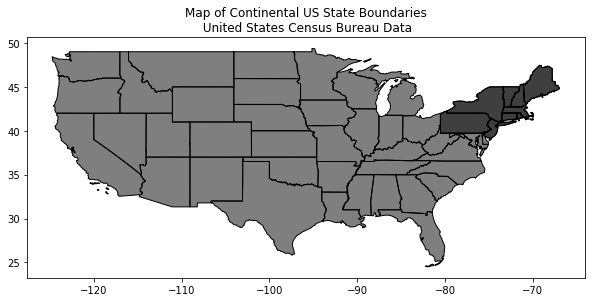

In [12]:
ax = state_boundary_us.plot(figsize=(10, 10), color="k")
# add title to map
ax.set(title="Map of Continental US State Boundaries\n United States Census Bureau Data")

## U.S. Boundary Layer

We can add a boundary layer of the United States to our map - to make it look
nicer. We will import
`data/week5/usa-boundary-layers/US-Boundary-Dissolved-States`.
If we specify a thicker line width using `lwd=4` for the border layer, it will
make our map visually pop!

## Is there a way to have some sort of color template to use throughout?

In [18]:
# import United States country boundary data
country_boundary_us = gpd.read_file('data/week5/usa-boundary-layers/US-Boundary-Dissolved-States.shp')
type(country_boundary_us)

geopandas.geodataframe.GeoDataFrame

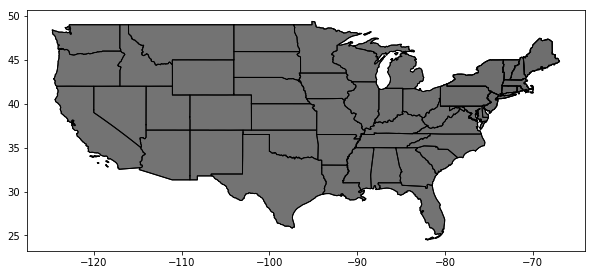

In [17]:
# plot data 
ax = state_boundary_us.plot(figsize=(10, 10), color='lightgrey')
country_boundary_us.plot(ax=ax, color='k', alpha=.5)

Next, let's add the location of our study area sites.
As we are adding these layers, take note of the class of each object. We will use
AOI to represent "Area of Interest" in our data.


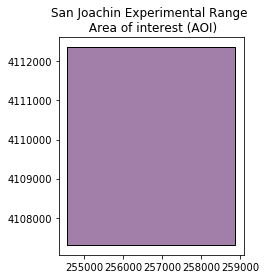

In [20]:
sjer_aoi = gpd.read_file("data/week5/california/SJER/vector_data/SJER_crop.shp")
ax = sjer_aoi.plot()
ax.set(title='San Joachin Experimental Range \n Area of interest (AOI)')

Our SJER AOI layer plots nicely. Let's next add it as a layer on top of the U.S. states and boundary
layers in our basemap plot.


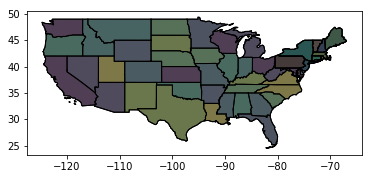

In [22]:
ax = state_boundary_us.plot()
country_boundary_us.plot(ax=ax, color='k', alpha=.5)

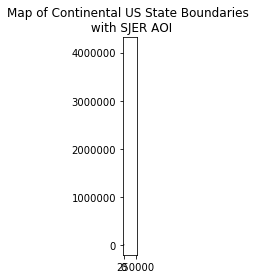

In [23]:
# add AOI boundary to map 
ax = state_boundary_us.plot()
country_boundary_us.plot(ax=ax, color='k', alpha=.5)
sjer_aoi.plot(ax=ax, color='r')
ax.set(title="Map of Continental US State Boundaries \n with SJER AOI")

What do you notice about the resultant plot? Do you see the AOI boundary in the 
California area? Is something wrong?

Let's check out the CRS (`crs()`) of both datasets to see if we can identify any
issues that might cause the point location to not plot properly on top of our
U.S. boundary layers.

In [24]:
# view CRS of each layer
print(sjer_aoi.crs)
print(country_boundary_us.crs)
print(state_boundary_us.crs)

{'init': 'epsg:32611'}
{'init': 'epsg:4326'}
{'init': 'epsg:4326'}


It looks like our data are in different CRS. We can tell this by looking at
the CRS strings in `proj4` format.

## Understanding CRS in Proj4 Format
The CRS for our data are given to us by `R` in `proj4` format. Let's break
down the pieces of `proj4` string. The string contains all of the individual
CRS elements that `R` or another GIS might need. Each element is specified
with a `+` sign, similar to how a `.csv` file is delimited or broken up by
a `,`. After each `+` we see the CRS element being defined. For example
projection (`proj=`) and datum (`datum=`).

### UTM Proj4 String
Our project string for `sjer_aoi` specifies the UTM projection as follows:

`+proj=utm +zone=18 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0`

* **proj=utm:** the projection is UTM, UTM has several zones.
* **zone=18:** the zone is 18
* **datum=WGS84:** the datum WGS84 (the datum refers to the  0,0 reference for
the coordinate system used in the projection)
* **units=m:** the units for the coordinates are in METERS.
* **ellps=WGS84:** the ellipsoid (how the earth's  roundness is calculated) for
the data is WGS84

Note that the `zone` is unique to the UTM projection. Not all CRS will have a
zone.

### Geographic (lat / long) Proj4 String

Our project string for `state_boundary_us` and `country_boundary_us` specifies
the lat/long projection as follows:

`+proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0`

* **proj=longlat:** the data are in a geographic (latitude and longitude)
coordinate system
* **datum=WGS84:** the datum WGS84 (the datum refers to the  0,0 reference for
the coordinate system used in the projection)
* **ellps=WGS84:** the ellipsoid (how the earth's roundness is calculated)
is WGS84

Note that there are no specified units above. This is because this geographic
coordinate reference system is in latitude and longitude which is most
often recorded in *Decimal Degrees*.

<i class="fa fa-star"></i> **Data Tip:** the last portion of each `proj4` string
is `+towgs84=0,0,0 `. This is a conversion factor that is used if a datum
conversion is required. We will not deal with datums in this tutorial series.
{: .notice}

## CRS Units - View Object Extent

Next, let's view the extent or spatial coverage for the `sjer_aoi` spatial
object compared to the `state_boundary_us` object.

In [27]:
# view spatial extent for both layers 
print(sjer_aoi.total_bounds)
print(state_boundary_us.total_bounds)


(254570.56699999966, 4107303.0768445507, 258867.40933092419, 4112361.9202610701)
(-124.72583900000001, 24.498130999999997, -66.949894999999998, 49.384357999999999)



Note the difference in the units for each object. The extent for
`state_boundary_us` is in latitude and longitude which yields smaller numbers
representing decimal degree units. Our AOI boundary point is in UTM, is
represented in meters.

***

## Proj4 & CRS Resources

* <a href="http://proj.maptools.org/faq.html" target="_blank">More information on the proj4 format.</a>
* <a href="http://spatialreference.org" target="_blank">A fairly comprehensive list of CRS by format.</a>
* To view a list of datum conversion factors type: `projInfo(type = "datum")`
into the `R` console.

***

## Reproject Vector Data

Now we know our data are in different CRS. To address this, we have to modify
or **reproject** the data so they are all in the **same** CRS. We can use
`spTransform()` function to reproject our data. When we reproject the data, we
specify the CRS that we wish to transform our data to. This CRS contains
the datum, units and other information that `R` needs to **reproject** our data.

The `spTransform()` function requires two inputs:

1. the name of the object that you wish to transform
2. the CRS that you wish to transform that object too. In this case we can
use the `crs()` of the `state_boundary_us` object as follows:
`crs(state_boundary_us)`

<i class="fa fa-star"></i> **Data Tip:** `spTransform()` will only work if your
original spatial object has a CRS assigned to it AND if that CRS is the
correct CRS!
{: .notice}

Next, let's reproject our point layer into the geographic - latitude and
longitude `WGS84` coordinate reference system (CRS).

In [38]:
sjer_aoi_WGS84 = sjer_aoi.to_crs(state_boundary_us.crs)
print(sjer_aoi.total_bounds)
print('sjer_aoi crs: ', sjer_aoi_WGS84.crs)
print('state boundary crs:', state_boundary_us.crs)

(254570.56699999966, 4107303.0768445507, 258867.40933092419, 4112361.9202610701)
sjer_aoi crs:  {'init': 'epsg:4326'}
state boundary crs: {'init': 'epsg:4326'}




Once our data are reprojected, we can try to plot again.




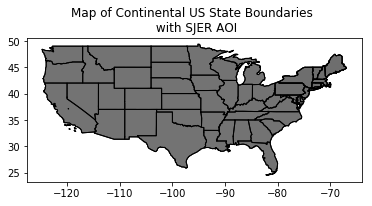

In [41]:
# plot data 
ax = state_boundary_us.plot(color='lightgrey')
country_boundary_us.plot(ax=ax, color='k', alpha=.5)
sjer_aoi_WGS84.plot(ax=ax, color='springgreen')
ax.set(title="Map of Continental US State Boundaries \n with SJER AOI")



But now, the aoi is a polygon and it's too small to see on the map. Let's convert

the polygon to a polygon CENTROID and plot yet again.




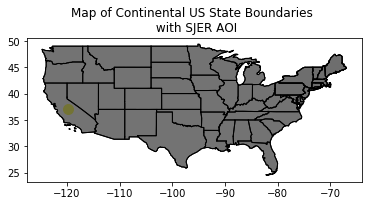

In [45]:
# ```{r plot-centroid, fig.cap="figure out AOI polygon centroid."}

# # get coordinate center of the polygon

# aoi_centroid <- coordinates(sjer_aoi_WGS84)



# # plot state boundaries

# plot(state_boundary_us,

#      main="Map of Continental US State Boundaries\n With SJER AOI",

#      border="gray40")



# # add US border outline

# plot(country_boundary_us,

#      lwd=4,

#      border="gray18",

#      add = TRUE)



# # add point location of the centroid to the plot

# points(aoi_centroid, pch=8, col="magenta", cex=1.5)



# ```

ax = state_boundary_us.plot(color='lightgrey')
country_boundary_us.plot(ax=ax, color='k', alpha=.5)
geo = sjer_aoi_WGS84['geometry'][0]
ax.scatter(geo.centroid.x, geo.centroid.y, s=100, color='yellow')
ax.set(title="Map of Continental US State Boundaries \n with SJER AOI")



Reprojecting our data ensured that things line up on our map! It will also
allow us to perform any required geoprocessing (spatial calculations /
transformations) on our data.

<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Test your skills: crop, reproject, plot data

Create a map of our SJER study area as follows:

1. Import the `madera-county-roads/tl_2013_06039_roads.shp` layer located in your week4 data download.
2. Create a map that shows the roads layer, study site locations and the sjer_aoi boundary.
3. Add a **title** to your plot.
4. Add a **legend** to your plot that shows both the roads and the plot locations.
5. Plot the roads by road type and add each type to the legend. HINT: use the metadata included in your data download to figure out what each type of road represents ("C", "S", etc.). [Use the homework lesson on custom legends]({{ site.url }}/course-materials/earth-analytics/week-5/r-custom-legend/) to help build the legend.
6. BONUS: Plot the plots by type - adjust the symbology of the plot locations (choose a symbol using pch for each type and adjust the color of the points).
7. Do your best to make the map look nice!

IMPORTANT: be sure that all of the data are within the same EXTENT and crs of the sjer_aoi
layer. This means that you may have to CROP and reproject your data prior to plotting it!

Your map should look something like the map below. You should of course use the
actual roads types that you find in the metadata rather than "Road type 1, etc"

NOTE: this is also a plot you will submit as a part of your homework this week!

</div>

## Note that this is a homework assignment code - so in this case the plot needs to be visible but the code hidden. 
## Note that we'll have to figure out how to create custom legends in python
## Color palettes...


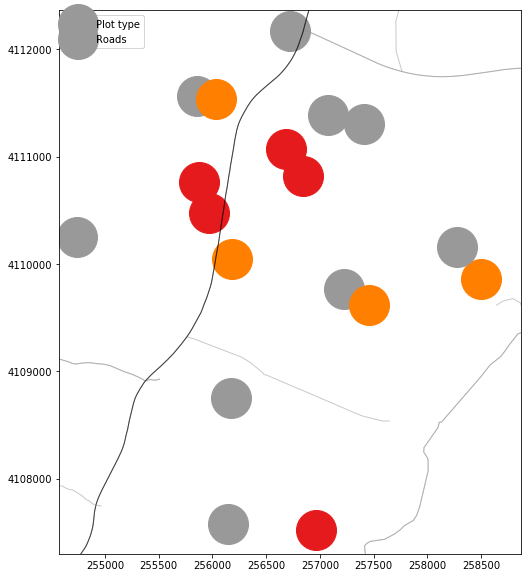

In [47]:
# Import data
sjer_aoi = gpd.read_file('data/week5/california/SJER/vector_data/SJER_crop.shp')
sjer_roads = gpd.read_file('data/week5/california/madera-county-roads/tl_2013_06039_roads.shp')
sjer_plots = gpd.read_file('data/week5/california/SJER/vector_data/SJER_plot_centroids.shp')

# Remove lines that have a road type value of NA (missing type)  
sjer_roads = sjer_roads.dropna(subset=['RTTYP'])

# reproject line and point data
sjer_roads_utm = sjer_roads.to_crs(sjer_aoi.crs)
bounds = sjer_aoi.bounds.iloc[0]

# plot data 
ax = sjer_plots.plot(figsize=(10, 10), markersize=40, column='plot_type')

# add roads
sjer_roads_utm.plot(ax=ax, cmap='Greys', alpha=.5, column='RTTYP', categorical=True)
# set axis limits (zoom into the plot)
ax.set(xlim=[bounds['minx'], bounds['maxx']], ylim=[bounds['miny'], bounds['maxy']])

# XXX Not sure how to get the legend working since it's plotting collections XXX
ax.legend(["Plot type", "Roads"])



##  how do i control the legend location?
## generally make the map look nicer?
# plotting is really painfully slow here. i wonder if we need to simplify the geometry just for plotting purposes